# Estimación de la estabilidad estadística de las simulaciones del software Casino v2

In [1]:
espesores=[80,240,400,480,520] #10kv
          [120,400,720,900,1080]#15kv
          [180,560,1020,1440,1680]#20
          [240,720,1360,1920,2300]#25
          [280,900,1680,2500,3000]#30

[[80, 227, 382, 497, 566], [129, 381, 687, 946, 1127]]

In [1]:
import pyautogui # contienen funciones que automatizan los movimientos del puntero y de las entradas del teclado 
import time

In [87]:
currentMouseX, currentMouseY = pyautogui.position()
print(f' en x = {currentMouseX}, en y = {currentMouseY}')

 en x = 543, en y = 482


In [3]:
time.sleep(3)
tini=time.time()
name='Si'
e0=10
listac = [545]#15#[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4200, 4400, 4600, 4800, 5000]
for thickness in listac:
    for i in range(0,16):
        tt=0.2
        pyautogui.moveTo(243,54,duration=tt,tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.moveTo(776,177,duration=tt,tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.write(str(thickness),interval=0.1)
        pyautogui.press('enter')
        pyautogui.press('enter')
        pyautogui.moveTo(15,30,duration=tt,tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.moveTo(30,120,duration=tt,tween=pyautogui.easeInOutQuad)
        pyautogui.click()
        pyautogui.write(f'Mar12_TiN_on_{name}_{e0}KV_{thickness}_nm_{i}',interval=0.1)
        pyautogui.press('enter')
    print(f'está listo el archivo .sim de {thickness}')
tfini=time.time()
print(f'Done!, la ejecución tardó {tfini-tini} segundos')

está listo el archivo .sim de 545
Done!, la ejecución tardó 93.84963965415955 segundos


In [17]:
426/60

7.1

# Generación de Archivos .DAT

In [4]:
import pyautogui # contienen funciones que automatizan los movimientos del puntero y de las entradas del teclado 
import time

In [7]:
import pyautogui
import time
import os 
import pandas as pd 
tiniT=time.time()

path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon\\Si estability\\20KV'
files=os.listdir(path)
#encuentra la ruta
files_cas = [f for f in files if f[-4:] == '.cas']
#toma solo los archivos terminados en .cas
daux={}
total=[]
for file in files_cas:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in file)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    daux['name']=file
    daux['thickness']=listOfNumbers[1+1]#se suma ese numero por el cambio de nombre
    daux['energy'] = listOfNumbers[0+1]
    daux['number'] = listOfNumbers[2+1]
    total.append(daux)
    daux={}
from operator import itemgetter
total.sort(key=itemgetter('thickness')) # ordena los diccionarios de total de menor a mayor thickness
##ABRIR CASINO_v2
pyautogui.FAILSAFE = True # si se desplaza el puntero a la esquina superior izquierda el programa deja de ejecutarse
for index in total: 
    name=index['name']
    thickness=index['thickness']
    energy = index['energy']
    number = index['number']
    tt=0.1
    time.sleep(2)#tiempo de espera mientras se abre la simulacion .cas #crítico
    #movimiento del puntero dentro del software ´para abrir 
    pyautogui.moveTo(15,28, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(15,73,duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    time.sleep(1)
    pyautogui.write(name)
    pyautogui.press('enter')
    print(f'el archivo {name} ha sido abierto!')
    t0=time.time()
    th=40
    x,y=8,80
    xs1=0
    ys1=0
    ys2=0
    time.sleep(2)# tiempo mientras se abre el archivo .cas
    
    xs1=37#distancia del
    ys1=51
    ys2=18#distancia entre carpeta y carpeta
    tt=0.1
    pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.move(0,ys1, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.move(xs1,0, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    ##export
    pyautogui.moveTo(48, 57, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.moveTo(218,57, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.write(f'Mar12TiN_on_Si_{energy}_KV_{thickness}_nm_time_{number}', interval=0.1*tt)
    pyautogui.press('enter')
    pyautogui.moveTo(x, y, duration=tt, tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(x, y+ys2, duration=tt, tween=pyautogui.easeInOutQuad)
    y=y+ys2
    x=x
    
    tf=time.time()
    delta=tf-t0
    print(delta)
    print(f'{name} Done!')
tfinT=time.time()
print(f'Los archivos .dat estan listos, la operación tardo {tfinT-tiniT} segundos, {(tfinT-tiniT)/60} minutos o {(tfinT-tiniT)/3600} horas.')

el archivo Mar12_TiN_on_Si_10KV_545_nm_0.cas ha sido abierto!
3.9401416778564453
Mar12_TiN_on_Si_10KV_545_nm_0.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_1.cas ha sido abierto!
3.9311416149139404
Mar12_TiN_on_Si_10KV_545_nm_1.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_10.cas ha sido abierto!
3.9605729579925537
Mar12_TiN_on_Si_10KV_545_nm_10.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_11.cas ha sido abierto!
3.9107954502105713
Mar12_TiN_on_Si_10KV_545_nm_11.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_12.cas ha sido abierto!
3.927692174911499
Mar12_TiN_on_Si_10KV_545_nm_12.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_13.cas ha sido abierto!
3.940887928009033
Mar12_TiN_on_Si_10KV_545_nm_13.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_14.cas ha sido abierto!
4.0301830768585205
Mar12_TiN_on_Si_10KV_545_nm_14.cas Done!
el archivo Mar12_TiN_on_Si_10KV_545_nm_15.cas ha sido abierto!
3.9273767471313477
Mar12_TiN_on_Si_10KV_545_nm_15.cas Done!
el archivo Mar12_TiN_o

In [10]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon\\Si estability\\20KV'
#path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dunsort=[]
Tika=[]
Nka=[]
Sika=[]
energy=[]
times=[]
thickness=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0+1])
    thickness.append(listOfNumbers[1+1])
    times.append(listOfNumbers[-1])
    f = open(path+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|N|Si)',text)
    dunsort.append(x)
    if len(x)==7:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(float(x[6][0]))
    elif len(x)==4:
        try:
            Tika.append(float(x[1][0]))
            Nka.append(float(x[3][0]))
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
        except(ValueError):
            Tika.append(float(x[1][0]))
            Nka.append(0.0)
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
    elif len(x)==5:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(0.0)

In [11]:
dic_data={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Sika':Sika,'Nka':Nka,'Times':times}
df=pd.DataFrame(dic_data)
df['I_ratio']=df.Sika/df.Tika
df

,Energy,Thickness,Tika,Sika,Nka,Times,I_ratio
0,10,545,586.969,0.823,350.086,0,0.001402
1,10,545,586.030,0.888,350.087,1,0.001515
2,10,545,587.061,0.829,351.094,10,0.001412
3,10,545,584.931,0.763,349.083,11,0.001304
4,10,545,587.064,1.018,351.649,12,0.001734
5,10,545,586.186,0.809,350.880,13,0.001380
6,10,545,586.053,0.720,349.237,14,0.001229
7,10,545,584.345,0.582,348.377,15,0.000996
8,10,545,585.223,0.846,347.947,2,0.001446
9,10,545,586.072,1.008,350.742,3,0.001720


In [14]:
df[df.Energy==10]

,Energy,Thickness,Tika,Sika,Nka,Times,I_ratio
0,10,545,586.969,0.823,350.086,0,0.001402
1,10,545,586.030,0.888,350.087,1,0.001515
2,10,545,587.061,0.829,351.094,10,0.001412
3,10,545,584.931,0.763,349.083,11,0.001304
4,10,545,587.064,1.018,351.649,12,0.001734
5,10,545,586.186,0.809,350.880,13,0.001380
6,10,545,586.053,0.720,349.237,14,0.001229
7,10,545,584.345,0.582,348.377,15,0.000996
8,10,545,585.223,0.846,347.947,2,0.001446
9,10,545,586.072,1.008,350.742,3,0.001720


In [15]:
avg = df[(df.Thickness==545) & (df.Energy==10)].sort_values('Times').I_ratio.mean()
stdd=df[(df.Thickness==545) & (df.Energy==10)].sort_values('Times').I_ratio.std()

In [17]:
avg,stdd

(0.0015047563216940478, 0.0002412656788768508)

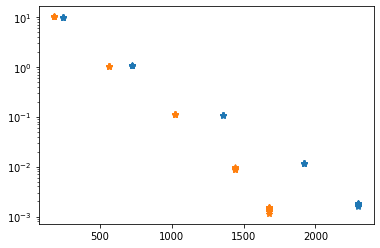

In [4]:
plt.plot(df[df.Energy==25].Thickness,df[df.Energy==25].I_ratio,'*',df[df.Energy==20].Thickness,df[df.Energy==20].I_ratio,'*')
plt.yscale('log')

In [37]:
stdd/avg*100

1.0550354908931094

In [7]:
espesores={10:[80,240,400,480,520],15:[120,400,720,900,1080],20:[180,560,1020,1440,1680],25:[240,720,1360,1920,2300],30:[280,900,1680,2500,3000]}

In [8]:
dica={}
thc0=[]
en0=[]
avg0=[]
std0=[]
Tiavg=[]
Tistd=[]
Siavg=[]
Sistd=[]
for i in espesores:
    for j in espesores[i]:
        avg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').I_ratio.mean()
        stdd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').I_ratio.std()
        tiavg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Tika.mean()
        tistd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Tika.std()
        siavg = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Sika.mean()
        sistd = df[(df.Thickness==j) & (df.Energy==i)].sort_values('Times').Sika.std()
        thc0.append(j)
        en0.append(i)
        avg0.append(avg)
        std0.append(stdd)
        Tiavg.append(tiavg)
        Siavg.append(siavg)
        Tistd.append(tistd)
        Sistd.append(sistd)
        #dica['Pstd'] = stdd/avg*100
dica['Energy'] = en0
dica['Thickness'] = thc0
dica['I_Avg'] = avg0
dica['Std'] = std0
dica['Tiavg']=Tiavg
dica['Siavg']=Siavg
dica['Tistd']=Tistd
dica['Sistd']=Sistd

In [9]:
dfstb=pd.DataFrame(dica)
dfstb

,Energy,Thickness,I_Avg,Std,Tiavg,Siavg,Tistd,Sistd
0,10,80,9.569081,0.082779,193.958000,1855.913125,1.136362,5.773983
1,10,240,0.932657,0.009840,526.377813,490.925438,1.346635,4.879209
2,10,400,0.069727,0.002111,584.917687,40.785125,1.028886,1.256924
3,10,480,0.010238,0.000852,585.685375,5.996000,0.925516,0.497206
4,10,520,0.003336,0.000318,585.616250,1.953500,0.886048,0.187176
5,15,120,10.770671,0.082691,345.557125,3721.750625,1.848578,12.964968
6,15,400,0.957519,0.010012,1316.081875,1260.141250,3.870985,9.951115
7,15,720,0.083326,0.002125,1791.324375,149.264625,3.556768,3.807411
8,15,900,0.012904,0.000768,1830.416250,23.618625,2.949836,1.394939
9,15,1080,0.001137,0.000170,1836.595000,2.088188,3.516185,0.314118


In [10]:
path

'C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon\\Si estability\\10KV'

In [12]:
dfstb['Pstd']=dfstb.Std/dfstb.I_Avg*100
#dfstb['Si_Pstd']=dfstb.Sistd/dfstb.Siavg*100
#dfstb['Ti_Pstd']=dfstb.Tistd/dfstb.Tiavg*100
dfstb
dfaux=dfstb.set_index(['Energy','Thickness'])
#plt.plot(dfstb[dfstb.Energy==10].Thickness,dfstb[dfstb.Energy==10].Pstd,'r*')
dfaux.to_excel(path+'\\'+'Corregido_Desv_TiN_on_Si.xlsx')
dfstb

,Energy,Thickness,I_Avg,Std,Tiavg,Siavg,Tistd,Sistd,Pstd
0,10,80,9.569081,0.082779,193.958000,1855.913125,1.136362,5.773983,0.865070
1,10,240,0.932657,0.009840,526.377813,490.925438,1.346635,4.879209,1.055035
2,10,400,0.069727,0.002111,584.917687,40.785125,1.028886,1.256924,3.027523
3,10,480,0.010238,0.000852,585.685375,5.996000,0.925516,0.497206,8.325440
4,10,520,0.003336,0.000318,585.616250,1.953500,0.886048,0.187176,9.525945
5,15,120,10.770671,0.082691,345.557125,3721.750625,1.848578,12.964968,0.767740
6,15,400,0.957519,0.010012,1316.081875,1260.141250,3.870985,9.951115,1.045599
7,15,720,0.083326,0.002125,1791.324375,149.264625,3.556768,3.807411,2.549841
8,15,900,0.012904,0.000768,1830.416250,23.618625,2.949836,1.394939,5.947986
9,15,1080,0.001137,0.000170,1836.595000,2.088188,3.516185,0.314118,14.992201


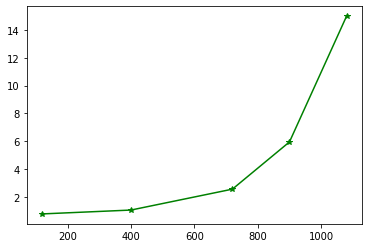

In [13]:
plt.plot(dfstb[dfstb.Energy==15].Thickness,dfstb[dfstb.Energy==15].Pstd,'g-*',label=i)

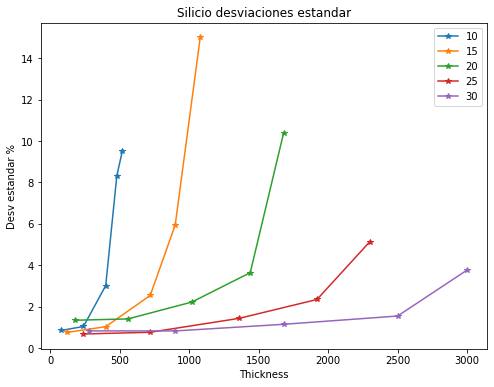

In [21]:
for i in espesores:
    #plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Si_Pstd,'r-*',label=f'Si {i}')
    #plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Ti_Pstd,'b-*',label=f'Ti {i}')
    plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Pstd,'-*',label=i)
    #plt.yscale('log')
    plt.ylabel('Desv estandar %')
    plt.xlabel('Thickness')
    plt.legend()
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Silicio desviaciones estandar')
plt.savefig('Si_stddev.jpg',format='jpg',dpi=300)

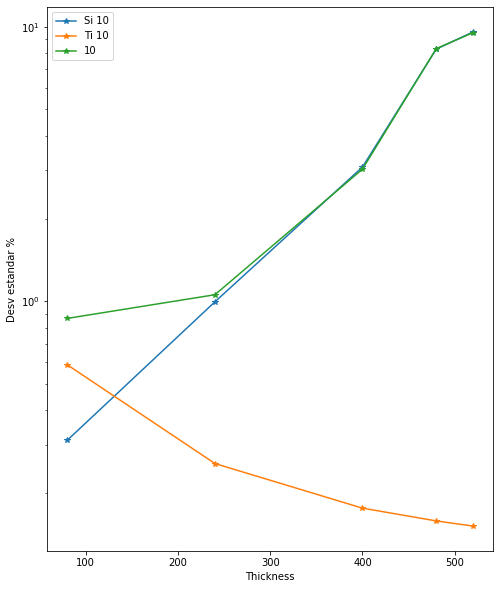

In [209]:
i=10
plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Si_Pstd,'-*',label=f'Si {i}')
plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Ti_Pstd,'-*',label=f'Ti {i}')
plt.plot(dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Pstd,'-*',label=i)
plt.yscale('log')
plt.ylabel('Desv estandar %')
plt.xlabel('Thickness')
plt.legend()

In [152]:
from scipy.optimize import curve_fit
import numpy as np
def ajuste(x,a,b):
    return a+x**b

In [153]:
parameters, covariance = curve_fit(ajuste, dfstb[dfstb.Energy==i].Thickness,dfstb[dfstb.Energy==i].Pstd)

-3.01129698805642 0.21295579717872676
[[ 3.02810845e+00 -8.33646058e-02]
 [-8.33646058e-02  2.46308541e-03]]


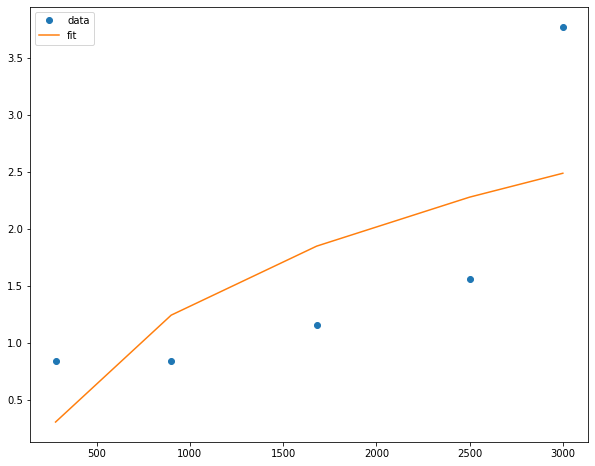

In [154]:
fit_A = parameters[0]
fit_B = parameters[1]
fig = plt.figure(figsize=(10,8))
print(fit_A,fit_B)
print(covariance)
fit_y = ajuste(dfstb[dfstb.Energy==i].Thickness, fit_A, fit_B)
plt.plot(dfstb[dfstb.Energy==i].Thickness, dfstb[dfstb.Energy==i].Pstd, 'o', label='data')
plt.plot(dfstb[dfstb.Energy==i].Thickness, fit_y, '-', label='fit')

plt.legend()

In [4]:
espesores=[[566], [129, 381, 687, 946, 1127]]

In [5]:
time.sleep(3)
tini=time.time()
name='Si'
energy=10
e0=15
for listac in espesores:
    tt=0.01 #tiempo de respuesta de los comandos
    #listac = [120,400,720,900,1080]#15#[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4200, 4400, 4600, 4800, 5000]
    #cambiar energía 
    pyautogui.moveTo(272,56,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.moveTo(578,270,duration=tt,tween=pyautogui.easeInOutQuad)
    pyautogui.click()
    pyautogui.click()
    pyautogui.write(str(energy),interval=0.1)
    pyautogui.press('enter')
    for thickness in listac:
        for i in range(0,16):
            pyautogui.moveTo(243,54,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.moveTo(776,177,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.write(str(thickness),interval=0.05)
            pyautogui.press('enter')
            pyautogui.press('enter')
            pyautogui.moveTo(15,30,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.moveTo(30,120,duration=tt,tween=pyautogui.easeInOutQuad)
            pyautogui.click()
            pyautogui.write(f'TiN_on_{name}_{energy}KV_{thickness}_nm_{i}',interval=0.05)
            pyautogui.press('enter')
        print(f'está listo el archivo .sim de {thickness}')
    energy = energy+5
tfini=time.time()
print(f'Done!, la ejecución tardó {tfini-tini} segundos')

está listo el archivo .sim de 566
está listo el archivo .sim de 129
está listo el archivo .sim de 381
está listo el archivo .sim de 687
está listo el archivo .sim de 946
está listo el archivo .sim de 1127
Done!, la ejecución tardó 286.98817253112793 segundos
